In [4]:
# !pip3 install tensorflow-text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/mail_data.csv")
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#we change spam to 1 and ham to 0 
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head()


,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df['Message'], df['spam'], stratify=df['spam'])


5383    Good day to You too.Pray for me.Remove the tee...
210               Both :) i shoot big loads so get ready!
581     Huh so early.. Then ü having dinner outside iz...
4936    Hey babe, how's it going ? Did you ever figure...
Name: Message, dtype: object

In [9]:
#importing bert model

bert_preprocess = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [11]:
# # Bert layers
# text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
# preprocessed_text = bert_preprocess(text_input)
# outputs = bert_encoder(preprocessed_text)

# # Neural network layers
# l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# # Use inputs and outputs to construct a final model
# model = tf.keras.Model(inputs=[text_input], outputs=[l])

# model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu',
                          name="dense")(l)  # Added dense layer
l = tf.keras.layers.Dropout(0.2, name="dropout2")(l)  # Added dropout layer
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
len(X_train)


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [15]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
131/131 [==============================] - 58s 329ms/step - loss: 0.3331 - accuracy: 0.8634
Epoch 2/10
131/131 [==============================] - 45s 343ms/step - loss: 0.2386 - accuracy: 0.8966
Epoch 3/10
131/131 [==============================] - 45s 340ms/step - loss: 0.1979 - accuracy: 0.9227
Epoch 4/10
131/131 [==============================] - 45s 343ms/step - loss: 0.1773 - accuracy: 0.9325
Epoch 5/10
131/131 [==============================] - 44s 338ms/step - loss: 0.1588 - accuracy: 0.9430
Epoch 6/10
131/131 [==============================] - 44s 338ms/step - loss: 0.1481 - accuracy: 0.9459
Epoch 7/10
131/131 [==============================] - 44s 338ms/step - loss: 0.1384 - accuracy: 0.9586
Epoch 8/10
131/131 [==============================] - 44s 338ms/step - loss: 0.1296 - accuracy: 0.9579
Epoch 9/10
131/131 [==============================] - 44s 335ms/step - loss: 0.1236 - accuracy: 0.9648
Epoch 10/10
131/131 [==============================] - 44s 336ms/step - l

In [22]:
#accuracy on test data
model.evaluate(X_test, y_test)
print(X_test)
#consufion matrix
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


44/44 [==============================] - 15s 337ms/step - loss: 0.0961 - accuracy: 0.9742
3771    Love it! The girls at the office may wonder wh...
1521    URGENT! Your Mobile No was awarded a £2,000 Bo...
3244    Pls accept me for one day. Or am begging you c...
781     Your opinion about me? 1. Over 2. Jada 3. Kusr...
1211            Guessin you ain't gonna be here before 9?
                              ...                        
97      i see. When we finish we have loads of loans t...
3477    I can probably come by, everybody's done aroun...
327                       Hi da:)how is the todays class?
4657                           K, I'll work something out
2193    Congrats ! Treat pending.i am not on mail for ...
Name: Message, Length: 1393, dtype: object
44/44 [==============================] - 14s 333ms/step


array([[1202,    4],
       [  32,  155]])

<Axes: >

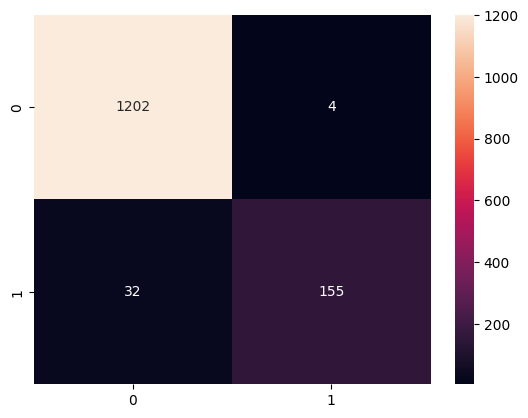

In [17]:
#heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.0f')


#generating report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



In [ ]:
model.save('my_model.h5')

In [71]:
def predict_mail(mail_string):
    mail_string = [mail_string]
    mail_string = tf.convert_to_tensor(mail_string)
    mail_string = tf.reshape(mail_string, [-1])
    pred =  model.predict(mail_string)[0][0]
    if pred >0.5:
      return 'SPAM'
    else:
      return 'HAM'

predict_mail("Congratulations to Chris Beardshaw and Piet Oudolf for their outstanding achievements at the 2023 Chelsea Flower Show. Chris received Gold for his sponsored garden, Myeloma UK - A Life Worth Living Garden. Piet was granted one of the inaugural Elizabeth Medals of Honour from King Charles III, recognising his remarkable contributions to horticulture and environmental well-being, benefiting future generations. If you're visiting the show, don't miss Chris' garden! Can’t make it this year? No worries, hop online to our website and enrol in one of their courses, empowering you to create your own masterpiece.")

1/1 [==============================] - 0s 30ms/step


'SPAM'